# Homework 2
In this homework assignment, you will explore Auto-MPG Dataset. 

Dataset contains following attributes:
1. mpg (miles per gallon)
2. cylinders (number of cylinders, power unit of an engine)
3. displacement (total volume of all the cylinders in an engine, measured in cubic centimeters [cc])
4. horsepower: (the amount of power an engine develops)
5. weight: (weight of the car)
6. acceleration: (accelaration of the car)
7. year: (model year of the car, two digits representing the year from 19**)
8. origin: (shows the origin of the car, 1 for American, 2 for European and 3 for Asian)
9. car name: (unique name for each car)

You will explore the data types and scales, cardinalities, number of missing values, detect outliers, handle missing values and outliers and create data quality report for original and cleaned dataset.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Read the dataset

In [2]:
adf = pd.read_csv('auto-mpg.csv')

### Q1 (10 points)
Identify the data types (numerical [int, float], categorical) and data scales for all the attributes.

In [3]:
# Answer to Q1

adf.info()
adf.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    int64  
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    int64  
 5   acceleration  406 non-null    float64
 6   year          406 non-null    int64  
 7   origin        406 non-null    int64  
 8   carname       406 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.7+ KB


<bound method NDFrame.head of       mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0       130.0    3504          12.0    70   
1    15.0          8         350.0       165.0    3693          11.5    70   
2    18.0          8         318.0       150.0    3436          11.0    70   
3    16.0          8         304.0       150.0    3433          12.0    70   
4    17.0          8         302.0       140.0    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
401  27.0          4         140.0        86.0    2790          15.6    82   
402  44.0          4          97.0        52.0    2130          24.6    82   
403  32.0          4         135.0        84.0    2295          11.6    82   
404  28.0          4         120.0        79.0    2625          18.6    82   
405  31.0          4         119.0        82.0    2720          19.4    82   

     origin                    ca

| Attribute  | Data Type  | Data Scale |
|------------|------------|------------|
|mpg         | num[float] |    ratio   |
|displacement| num[float] |    ratio   |
|horsepower  | num[float] |    ratio   |
|weight      | num[int]   |    ratio   |
|year        | num[int]   |   interval |
|origin      |categorical |   nominal  |
|carname     |categorical |   nominal  |

mpg - , ratio
cylinders - numerical[int], ratio
displacement - numerical[float], ratio
horsepower - numerical[float], ratio
weight - numerical[int], ratio
acceleration - numerical[float], ratio
year - numerical[int], interval
origin - numerical[int], nominal
carname - categorical, nominal


### Q2 (20 points)
Identify the cardinalities (number of unique values) and number of missing values for each attribute

In [4]:
# Your answer to Q2 goes here!

for (name, series) in adf.iteritems():
    print('Column:', name)
    print('\tNumber of records', series.size)
    print('\tNumber of missing values', series.isnull().sum())
    print('\tNumber of unique values', series.unique().size)


Column: mpg
	Number of records 406
	Number of missing values 8
	Number of unique values 130
Column: cylinders
	Number of records 406
	Number of missing values 0
	Number of unique values 6
Column: displacement
	Number of records 406
	Number of missing values 0
	Number of unique values 83
Column: horsepower
	Number of records 406
	Number of missing values 6
	Number of unique values 94
Column: weight
	Number of records 406
	Number of missing values 0
	Number of unique values 357
Column: acceleration
	Number of records 406
	Number of missing values 0
	Number of unique values 96
Column: year
	Number of records 406
	Number of missing values 0
	Number of unique values 13
Column: origin
	Number of records 406
	Number of missing values 0
	Number of unique values 3
Column: carname
	Number of records 406
	Number of missing values 0
	Number of unique values 312


### Q3 (20 points)
Visualize the distribution of each attribute (other than carname, since it is unique). Note here that for nominal and ordinal scale attributes, use bar plots. For ratio and interval scale attributes, use histograms.

Hint: To get the counts of numerical (but also nominal) attributes, you can use `value_counts()` method.


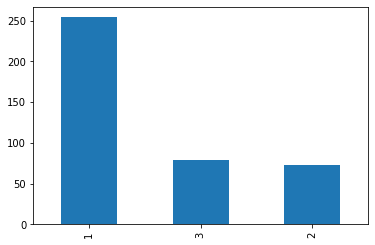

In [5]:
# For categorical attributes
adf["origin"].value_counts().plot(kind="bar")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B11CB52F48>,
      dtype=object)

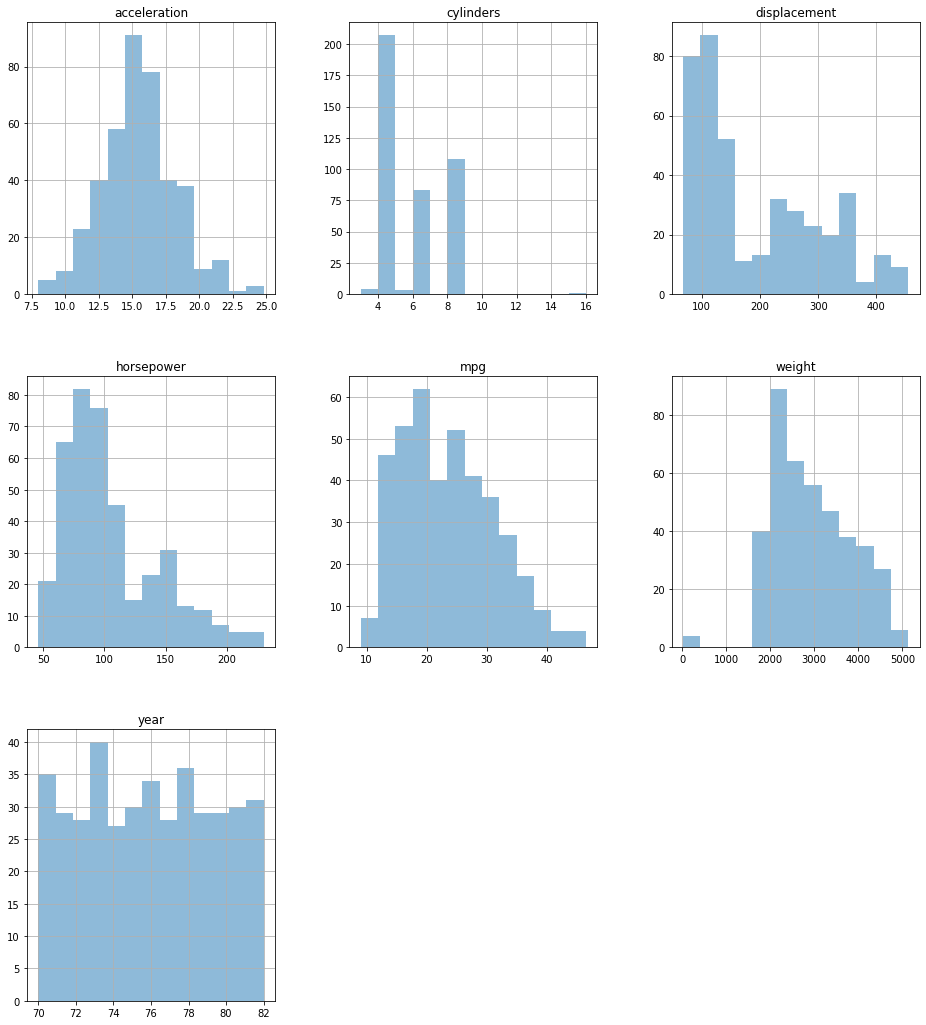

In [6]:
# For numerical attributes
col_list = []
for (name, series) in adf.iteritems():
    if series.dtype != 'object' and name != 'origin':
        col_list.append(name)
adf_for_hist = adf[col_list]
adf_for_hist.hist(bins=13, alpha=0.5, figsize= (16,18))


### Q4 (20 points)
Using your favorite outlier detection method, identify the outliers for each attribute (other than year, origin, and carname). For each outlier, remove the outlier or replace with a default value.

Hint 1: For simplicity, you can use $\mu \pm 2\sigma$ (alternatively, $3\sigma$) or the interval between $Q1-1.5IQR$ and $Q3+1.5IQR$.

Hint 2: To replace, you can use the median/mean value or minimum/maximum value depending on the direction of the outlier.


In [10]:
# Answer to Q4 goes here

col_list = []
for (name, series) in adf.iteritems():
    if series.dtype != 'object' and name != 'origin' and name != 'year':
        col_list.append(name)
adf_out = adf[col_list]

Q1 = adf_out.quantile(0.25)
Q3 = adf_out.quantile(0.75)
IQR = Q3 - Q1

adf_out2 = adf_out[~((adf_out < (Q1 - 1.5 * IQR)) |(adf_out > (Q3 + 1.5 * IQR))).any(axis=1)]
adf_out2.shape

(386, 6)

### Q5 (10 points)
Handle the missing values you found in Q2 using kNN imputation. Use `KNNImputer` from `sklearn.imputer` for this task. Set the number of neighbors to 3 and use the column subset of `['cylinders', 'displacement', 'weight']` for imputation.

In [11]:
# Answer to Q5 goes here
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
impute_copy = adf[['cylinders', 'displacement', 'weight']].copy()

knn_imputer.fit_transform(impute_copy)

for (name, series) in impute_copy.iteritems():
    print('ANALYZING THE COLUMN:', name)
    print('\tTotal number of records', series.size)
    print('\tNumber of missing values', series.isnull().sum())
    print('\tPercentage of missing values {0}%'.format(((series.isnull().sum()/series.size)*100)) )
    print('\tNumber of unique values', series.unique().size)

ANALYZING THE COLUMN: cylinders
	Total number of records 406
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 6
ANALYZING THE COLUMN: displacement
	Total number of records 406
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 83
ANALYZING THE COLUMN: weight
	Total number of records 406
	Number of missing values 0
	Percentage of missing values 0.0%
	Number of unique values 357


### Q6 (20 points)
Create a Scatter Plot Matrix (a pair plot) of attributes. Use `origin` map plot aspects to different colors. Based on the SPLOM, answer the following questions.

#### Q6.a -  What can you say about the relationship between cylinders and mpg values?
#### Q6.b -  What can you say about the cylinders of Asian cars (origin = 3)?
#### Q6.c -  Is there a correlation between weight and displacement?

Hint: Use keyword argument `hue='origin'` and `markers` to see the differences of cars with different origins.


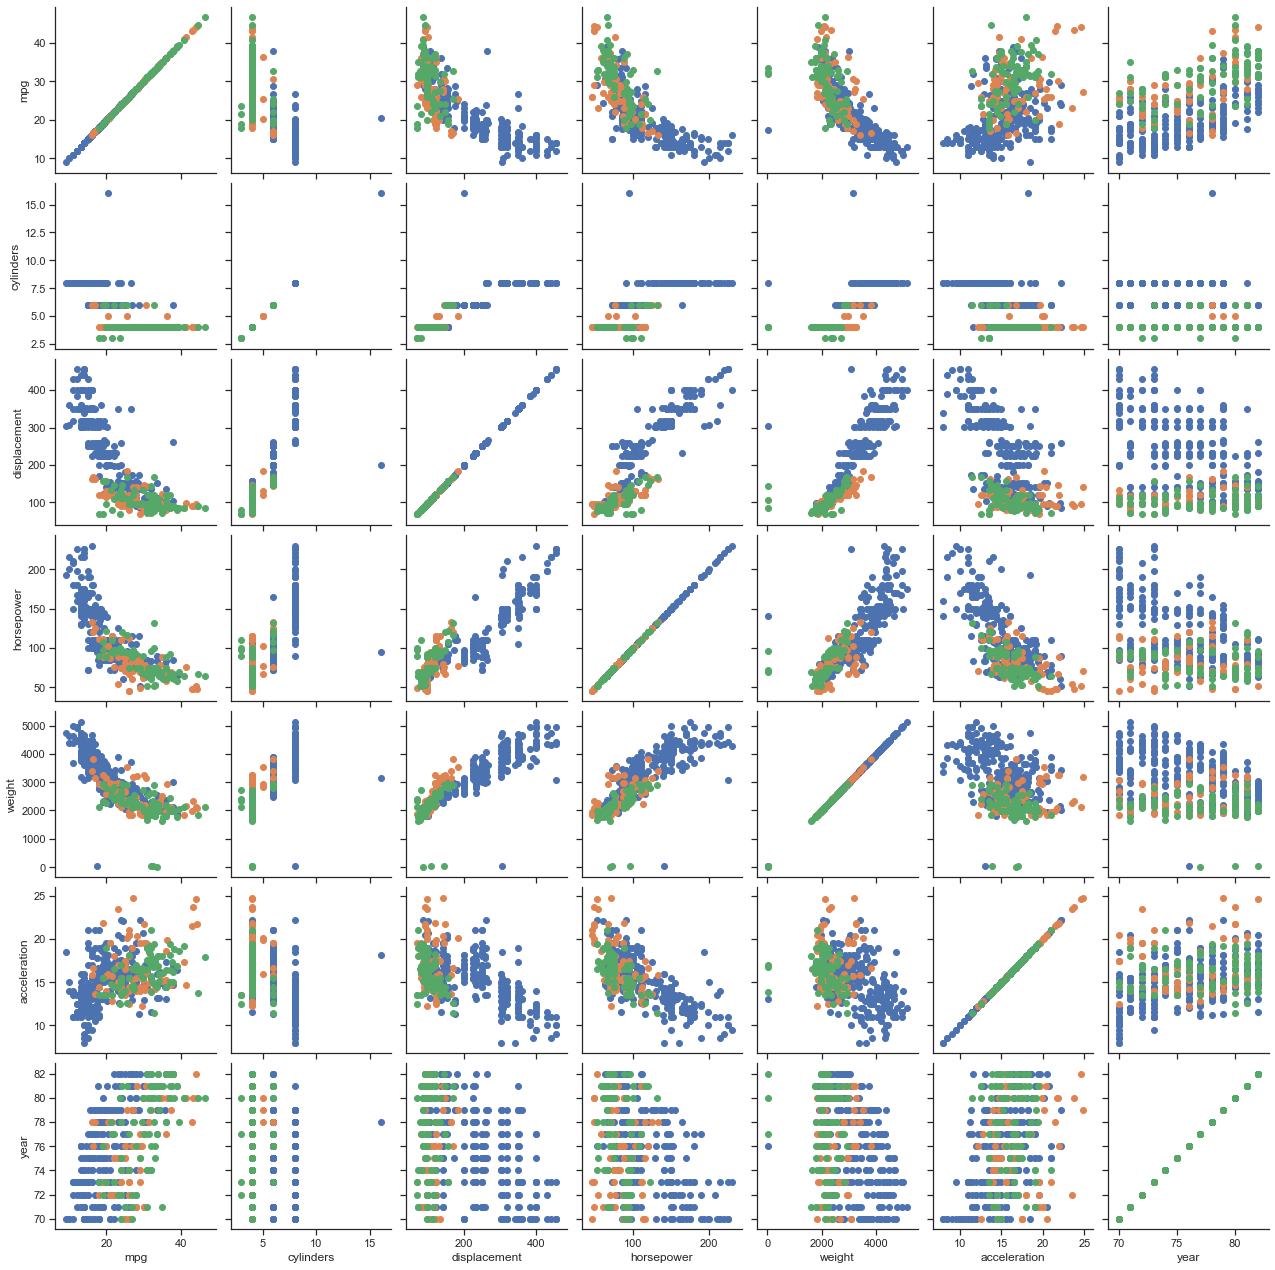

In [10]:
import seaborn as sns
sns.set(style="ticks")

adf_scatter = adf._get_numeric_data()


g = sns.PairGrid(data = adf_scatter, hue="origin")
g.map(plt.scatter)



 6a. as the number of cylinders increases, the mpg of a car tends to decrease
 6b. Asian cars tend to have a lower amount of cylinders compared to other regions
 6c. yes, there is a positive correlation between weight and displacement

### Bonus Question (20 points)

Create a data quality report for the Auto-MPG dataset. 

Provide the data quality tables, distributions of categorical and nominal variables.

Also provide your solutions for handling outliers and missing values. 

Create the data quality tables after handling outliers and missing values.

Provide this as a separate PDF file. You can use the cells below to find statistics and create visualizations.


In [24]:
#Doing imputation and outlier removal on whole data set (I did it on copies in the questions above)
adf_dqout = adf_out2.copy()
adf_dqout.shape


knn_imputer = KNNImputer(n_neighbors=3)

knn_imputer.fit_transform(adf_dqout[['cylinders', 'displacement', 'weight','mpg','horsepower','acceleration']])


adf_dqout.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,379.000000,386.000000,386.000000,380.000000,386.000000,386.000000
mean,23.529551,5.432642,190.744819,103.157895,2957.603627,15.566321
std,7.569748,1.689347,100.392840,35.240692,832.882821,2.554315
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.500000
25%,17.600000,4.000000,105.000000,76.000000,2220.750000,14.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000
75%,29.000000,7.500000,260.000000,122.750000,3573.000000,17.075000
max,44.600000,8.000000,429.000000,210.000000,5140.000000,22.200000


In [19]:
adf['origin'].describe()

count    406.000000
mean       1.568966
std        0.797479
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: origin, dtype: float64

In [33]:
adf.groupby('origin').size()/adf['origin'].count()

origin
1    0.625616
2    0.179803
3    0.194581
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B11F874808>,
      dtype=object)

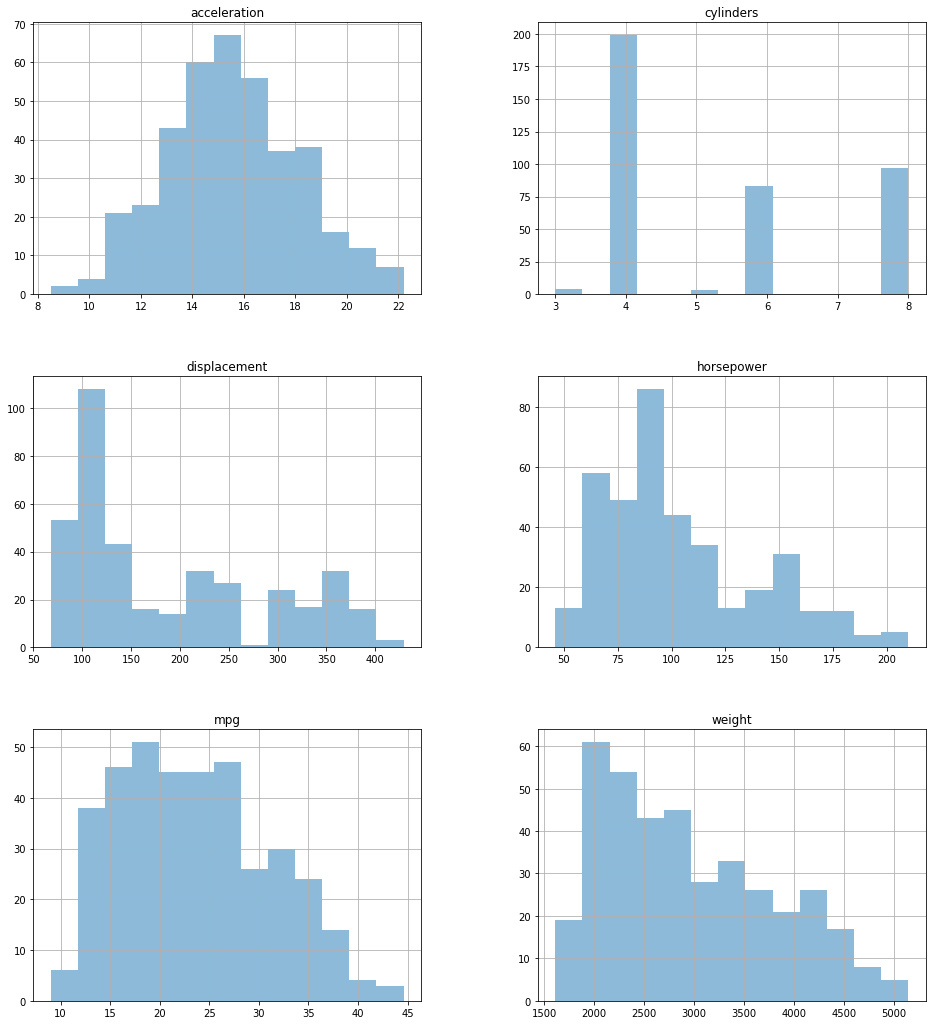

In [17]:
adf_dqout.hist(bins=13, alpha=0.5, figsize= (16,18))